# ⚙️ Extreme Value Theory (EVT) and Tail Fitting in Financial Risk Analysis

## 1️⃣ Introduction

Financial markets often experience **rare but severe price movements** — so-called *tail events* — that are not well captured by traditional risk models assuming normal (Gaussian) return distributions.  
These tail events can lead to **extreme losses**, especially during market shocks, crises, or high-volatility periods such as those seen in cryptocurrency markets.

To address this limitation, **Extreme Value Theory (EVT)** provides a robust statistical framework for modeling **the tails of return distributions** — i.e., the extreme ends of loss distributions that standard methods often underestimate.

### Why EVT Matters:
- **Beyond Normality:** Financial return distributions are *leptokurtic* (fat-tailed), meaning that large deviations occur more frequently than predicted by the Normal distribution.
- **Improved Tail Risk Estimation:** EVT focuses explicitly on modeling the extreme losses (e.g., worst 1% of returns).
- **Regulatory Relevance:** EVT-based VaR and CVaR measures align with advanced risk management frameworks used in stress testing, portfolio optimization, and Basel III risk compliance.
- **Asset-Specific Insights:** By fitting different tail behaviors (e.g., NIFTY vs BTC), we gain deeper insight into how risk profiles differ across asset classes and volatility regimes.

---

## 2️⃣ EVT Methodology Overview

In this analysis, we:
1. **Identify tail losses** (returns beyond a defined threshold).
2. **Fit a Generalized Pareto Distribution (GPD)** to these excess losses using the Peak-Over-Threshold (POT) approach.
3. **Estimate EVT-based Value at Risk (VaR)** and compare it with:
   - Historical (empirical) VaR  
   - Parametric Normal VaR  

This approach allows us to better estimate the likelihood of rare, large losses and test how far real-world data deviates from the normal assumption.

---

## 📘 How to Read the EVT Tail Risk Plots and Results

This section explains how to interpret the **histograms**, **GPD tail‐fit plots**, and the **EVT vs Historical/Normal VaR comparison table**.

---

### 1. Understanding the Loss Axis Convention

- The horizontal axis is labeled **“Loss (negative of log return)”**.
- This means that daily log returns $ r_t $ are converted into losses as:

  $
  L_t = -r_t
  $

  so that:
  - **Negative returns (losses)** → become **positive loss values**  
  - **Positive returns (gains)** → become **negative loss values**

✅ **Interpretation:**  
Losses appear on the **right-hand side** of the chart (positive axis), making it easier to visualize the risk tail.

| Axis Side | Sign of $ L_t $ | Interpretation |
|:-----------|:----------------:|:---------------|
| Left side | Negative | Gains / small losses |
| Right side | Positive | Larger losses (risk tail) |

---

### 2. Reading the Histogram with VaR Lines

Each histogram compares three Value at Risk (VaR) estimates:

- **Blue dashed line** → Historical VaR (empirical quantile)
- **Green dashed line** → Normal VaR (Gaussian assumption)
- **Red dashed line** → EVT VaR (fitted from Generalized Pareto tail)
- **Red shaded region** → Tail area beyond the EVT threshold

**How to interpret:**
- The farther right the red (EVT) line is relative to blue/green → the **heavier the tail**.
- The shaded tail region indicates **observed extreme losses** used in GPD fitting.
- The height of the histogram shows how frequently those losses occur.

---

### 3. Reading the GPD Tail Fit Plot

The **GPD fit plots** show how well the Generalized Pareto Distribution captures the extreme tail.

- **Blue dots** → Empirical exceedance probability (survival function)
- **Red curve** → Fitted GPD model

**Interpretation:**
- If the red line follows the blue dots closely → good EVT fit.
- A **slowly decaying red curve** (flatter slope) means **fat tails**, i.e., higher probability of large losses.
- The estimated parameters $ \xi $ (shape) and $ \beta $ (scale) summarize tail heaviness:
  - $ \xi > 0 $: Fat-tailed (power-law decay)
  - $ \xi = 0 $: Exponential tail (light)
  - $ \xi < 0 $: Thin tail (bounded losses)

---

### 4. Reading the VaR Comparison Table

| Metric | Description | Interpretation |
|:--------|:-------------|:----------------|
| **HistVaR** | Empirical quantile based on historical data | Purely data-driven, may miss unseen extremes |
| **NormVaR** | Based on Normal distribution assumption | Underestimates risk if tails are heavy |
| **EVT_VaR** | Based on GPD tail fit beyond threshold | More accurate for rare, extreme events |
| **μ / σ** | Mean and volatility of log returns | Context for typical daily fluctuations |

**Example:**  
If **EVT_VaR(99%) > Historical VaR(99%)**, then EVT detects **fatter tails and greater extreme loss risk**.

---

### 5. Practical Reading Flow

1. **Start with the histogram** – see where the VaR cutoffs lie.  
2. **Look at the red shaded area** – this is the region EVT is modeling.  
3. **Compare EVT vs Normal lines** – large gaps imply heavy tails.  
4. **Check the GPD fit plot** – confirms tail fit quality.  
5. **Review the VaR table** – quantify how EVT alters risk metrics.

---

### 6. Key Takeaways

- Losses are plotted as **positive magnitudes** (right = worse).  
- **EVT VaR > Normal VaR** indicates **heavier tails** and higher risk of extreme losses.  
- **BTC** shows far heavier tails than **NIFTY**, consistent with its higher volatility.  
- Combining plots + table provides a full picture of tail behavior: *frequency, magnitude, and model fit.*

---

### 💡 Quick Summary

> **Histogram** → Where tail losses start  
> **GPD Fit** → How well EVT captures tail shape  
> **VaR Table** → How each model quantifies risk  
> **Right Side = Big Losses** ✅

---


Downloaded.
Data aligned to 949 dates.

Processing NIFTY ...
  done: NIFTY
Processing BTC ...
  done: BTC

=== VaR Comparison (daily losses, positive numbers) ===

       HistVaR_95%  NormVaR_95%  EVT_VaR_95%  HistVaR_99%  NormVaR_99%  \
Asset                                                                    
NIFTY     0.013405     0.013840     0.013457     0.022855     0.019738   
BTC       0.051021     0.055374     0.051252     0.085882     0.078658   

       EVT_VaR_99%  Norm_mu  Norm_sigma  
Asset                                    
NIFTY     0.022552 0.000394    0.008654  
BTC       0.091975 0.000825    0.034167  

Plotting diagnostics for NIFTY ...


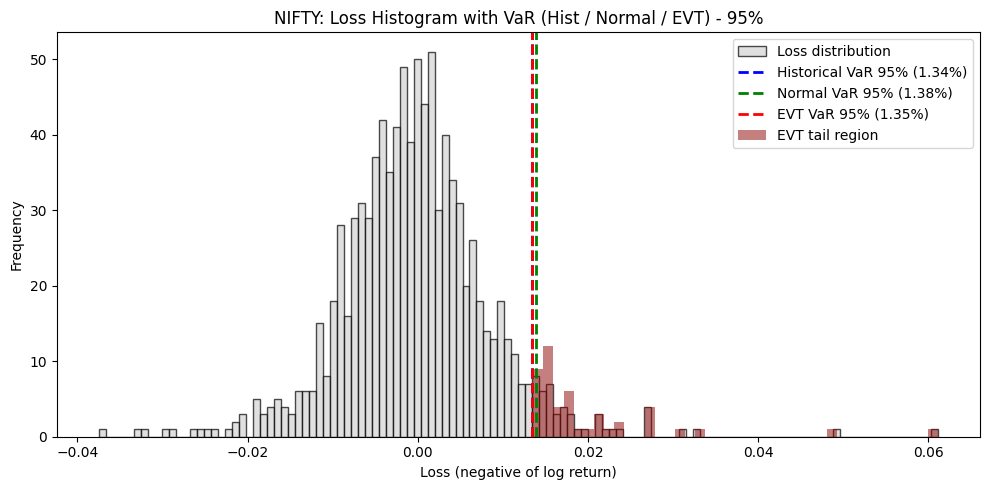

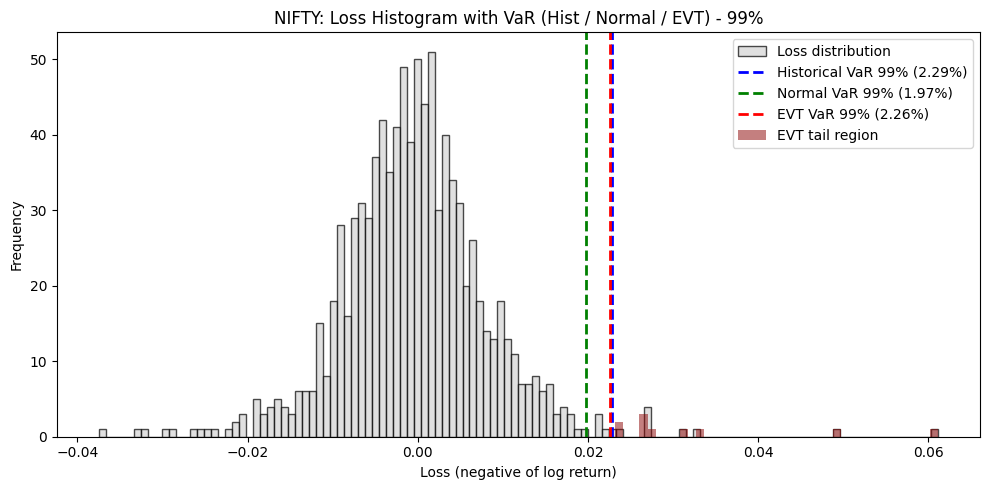

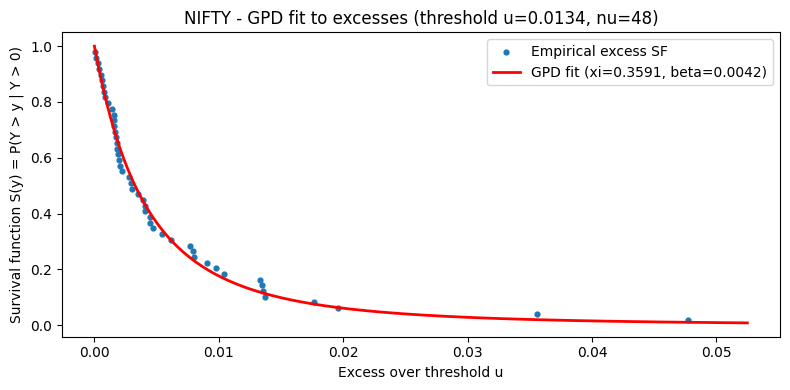


Plotting diagnostics for BTC ...


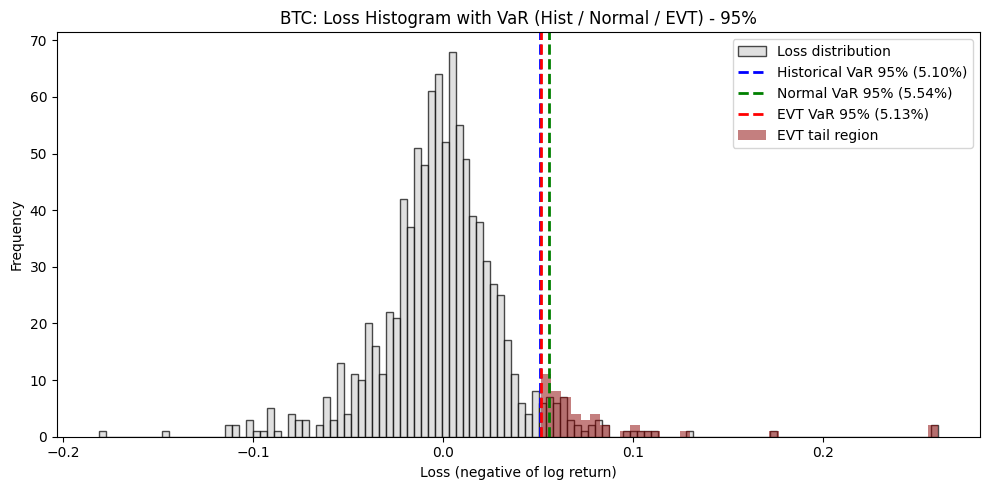

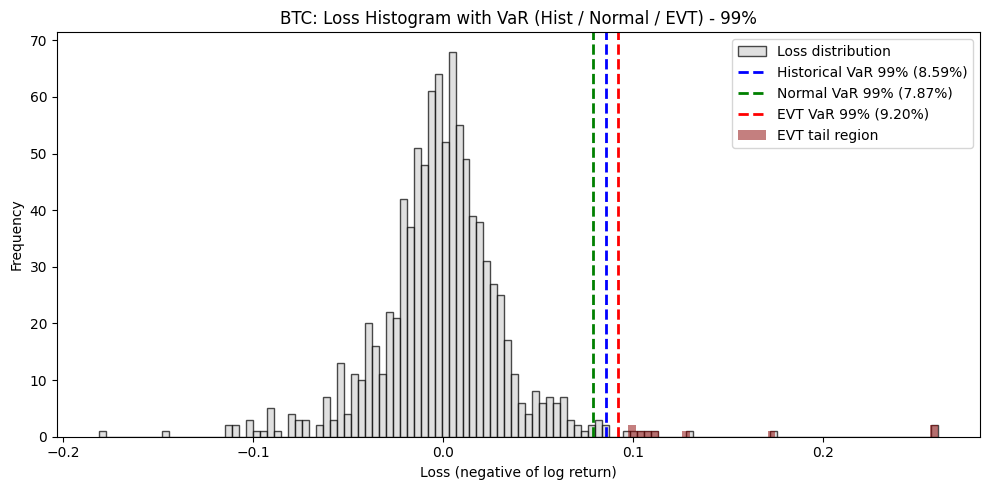

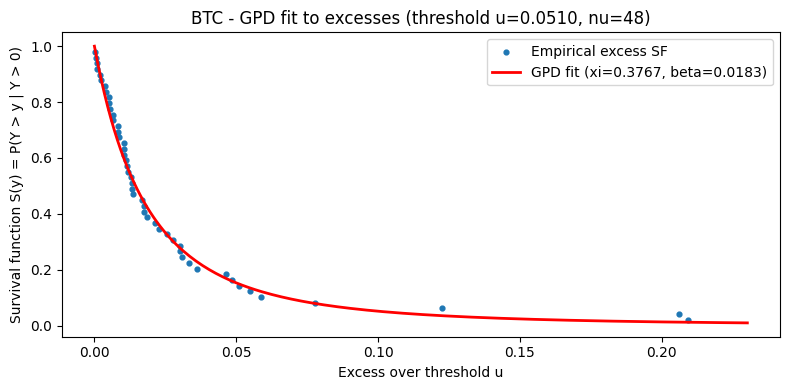

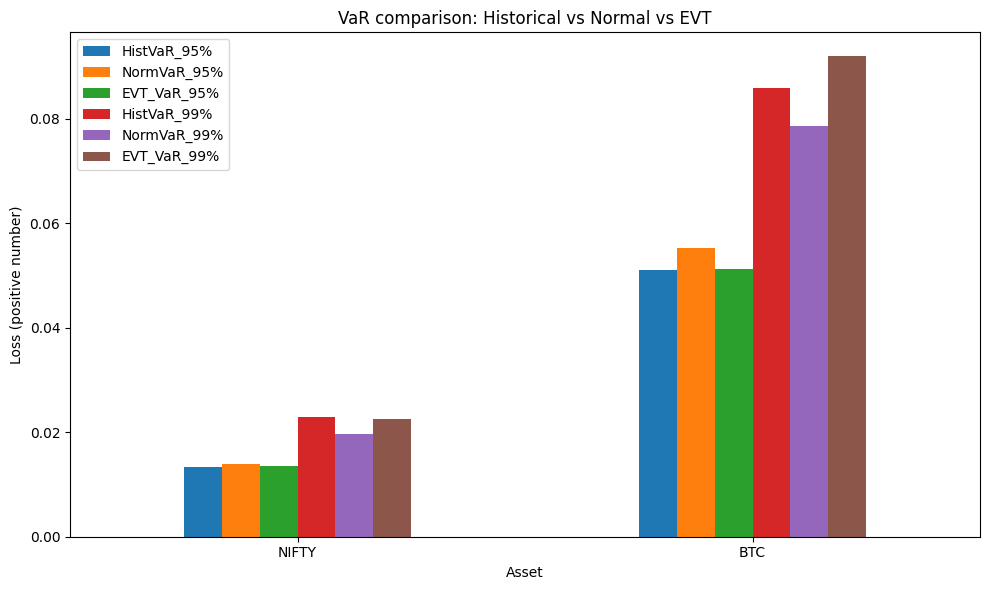

In [1]:
# evt_var_compare.py
# Requirements:
# pip install yfinance pandas numpy scipy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ---------------------------
# Parameters
tickers = {"NIFTY": "^NSEI", "BTC": "BTC-USD"}
start_date = "2022-01-01"
end_date = None
alpha_levels = [0.05, 0.01]    # VaR levels (left tail) -> 95% and 99%
use_log_returns = True
# POT parameters
threshold_quantile = 0.95      # threshold for POT (use losses' 95th percentile)
min_exceedances = 30           # require at least this many exceedances to fit GPD
# ---------------------------

def download_prices(ticker, start=None, end=None):
    df = yf.download(ticker, start=start, end=end, progress=False, auto_adjust=False)
    if df.empty:
        raise RuntimeError(f"No data downloaded for {ticker}.")
    return df['Adj Close']

def compute_returns(price_series, log=True):
    # ensure a 1d Series
    if isinstance(price_series, pd.DataFrame):
        price_series = price_series.iloc[:, 0]
    if log:
        r = np.log(price_series).diff().dropna()
    else:
        r = price_series.pct_change().dropna()
    return r.squeeze()

def historical_var(returns, alpha):
    q = returns.quantile(alpha)
    return float(-q)   # return positive loss

def parametric_normal_var(returns, alpha):
    mu = returns.mean()
    sigma = returns.std(ddof=1)
    z = stats.norm.ppf(alpha)
    q = mu + sigma * z
    return float(-q), float(mu), float(sigma)

def fit_gpd_pot(losses, q=threshold_quantile):
    """
    losses: pd.Series of positive losses (loss = -returns)
    q: threshold quantile (e.g. 0.95)
    Returns: dict with threshold u, Fu, nu, params (xi, beta), success flag and diagnostics.
    """
    losses = losses.dropna()
    # ensure Series
    if isinstance(losses, pd.DataFrame):
        losses = losses.iloc[:, 0]
    N = len(losses)
    if N == 0:
        raise RuntimeError("No loss observations.")
    u = losses.quantile(q)
    exceedances = losses[losses > u]
    nu = len(exceedances)
    Fu = nu / N   # proportion exceedances

    res = {"N": N, "u": float(u), "nu": nu, "Fu": Fu, "fitted": False}
    if nu < min_exceedances:
        # Not enough exceedances to fit reliably
        return res

    # excesses over threshold
    excesses = exceedances - u
    # Fit GPD to excesses: scipy's genpareto.fit returns (c, loc, scale)
    # fit with loc=0 for excesses
    try:
        c, loc, scale = stats.genpareto.fit(excesses.values, floc=0)
        xi = float(c)
        beta = float(scale)
        res.update({"xi": xi, "beta": beta, "fitted": True, "excesses": excesses})
    except Exception as e:
        res.update({"fit_error": str(e)})
    return res

def evt_var_from_gpd(fit_res, alpha):
    """
    Compute EVT/POT VaR for loss probability alpha (e.g. alpha=0.01 for 99% VaR)
    Returns VaR (positive loss) or np.nan if not fitted.
    Formula: VaR_alpha = u + (beta/xi) * ((Fu/alpha)**xi - 1)  (xi != 0)
    If xi ~ 0: VaR_alpha = u + beta * log(Fu/alpha)
    Note: requires alpha < Fu for interpolation? Actually if alpha < Fu, we are extrapolating beyond threshold.
    """
    if not fit_res.get("fitted", False):
        return np.nan
    u = fit_res["u"]
    Fu = fit_res["Fu"]
    xi = fit_res["xi"]
    beta = fit_res["beta"]
    # alpha must be < Fu to extrapolate beyond threshold; if alpha >= Fu we can use empirical quantile
    if alpha >= Fu:
        # fallback: empirical quantile
        # But this branch shouldn't generally be used if threshold chosen at quantile like 0.95 and alpha lower (0.05 or 0.01)
        return np.nan

    # safe numerical handling
    ratio = Fu / alpha
    if abs(xi) < 1e-8:
        # xi -> 0 limit (exponential)
        var = u + beta * np.log(ratio)
    else:
        var = u + (beta / xi) * (ratio**xi - 1.0)
    return float(var)

# ---------------------------
# Download data
price_data = {}
print("Downloading price data...")
for name, ticker in tickers.items():
    price_data[name] = download_prices(ticker, start=start_date, end=end_date)
print("Downloaded.")

# Align dates by intersection to compare same sample (optional)
common_index = price_data[list(price_data.keys())[0]].index
for s in list(price_data.values())[1:]:
    common_index = common_index.intersection(s.index)
for k in price_data:
    price_data[k] = price_data[k].loc[common_index]
print(f"Data aligned to {len(common_index)} dates.\n")

# Analyze each asset
summary_rows = []
detailed_fits = {}
for name, price_series in price_data.items():
    print(f"Processing {name} ...")
    returns = compute_returns(price_series, log=use_log_returns)   # Series
    # ensure 1d Series
    if isinstance(returns, pd.DataFrame):
        returns = returns.iloc[:, 0]

    # Historical VaR
    hist_v = {}
    for a in alpha_levels:
        hist_v[a] = historical_var(returns, a)

    # Parametric Normal VaR
    norm_v = {}
    mu, sigma = None, None
    for a in alpha_levels:
        v, mu, sigma = parametric_normal_var(returns, a)
        norm_v[a] = v

    # EVT: fit to losses (positive numbers)
    losses = -returns
    fit_res = fit_gpd_pot(losses, q=threshold_quantile)
    detailed_fits[name] = fit_res

    evt_v = {}
    for a in alpha_levels:
        evt_v[a] = evt_var_from_gpd(fit_res, a)

    # Add to summary
    row = {"Asset": name}
    for a in alpha_levels:
        p = int((1 - a) * 100)
        row[f"HistVaR_{p}%"] = hist_v[a]
        row[f"NormVaR_{p}%"] = norm_v[a]
        row[f"EVT_VaR_{p}%"] = evt_v[a]
    row["Norm_mu"] = mu
    row["Norm_sigma"] = sigma
    summary_rows.append(row)
    print(f"  done: {name}")

df_cmp = pd.DataFrame(summary_rows).set_index("Asset")
pd.options.display.float_format = "{:.6f}".format

print("\n=== VaR Comparison (daily losses, positive numbers) ===\n")
print(df_cmp.round(6))

# ---------------------------
# Plots
# ---------------------------
for name, price_series in price_data.items():
    print(f"\nPlotting diagnostics for {name} ...")
    returns = compute_returns(price_series, log=use_log_returns)
    if isinstance(returns, pd.DataFrame):
        returns = returns.iloc[:, 0]
    losses = -returns

    fit_res = detailed_fits[name]
    # Extract scalar quantiles safely
    q95 = losses.quantile(0.95)
    q99 = losses.quantile(0.99)

    # For each alpha: show histogram and EVT VaR (if fitted)
    for a in alpha_levels:
        level = int((1 - a) * 100)
        hist_v = df_cmp.loc[name, f"HistVaR_{level}%"]
        norm_v = df_cmp.loc[name, f"NormVaR_{level}%"]
        evt_v = df_cmp.loc[name, f"EVT_VaR_{level}%"]

        # Prepare scalarify
        def to_scalar(x):
            if isinstance(x, (pd.Series, np.ndarray)):
                return float(np.asarray(x).ravel()[0])
            else:
                return float(x) if (x is not None and not np.isnan(x)) else np.nan

        hist_v = to_scalar(hist_v)
        norm_v = to_scalar(norm_v)
        evt_v = to_scalar(evt_v)

        plt.figure(figsize=(10,5))
        # plot loss histogram
        plt.hist(losses, bins=120, color='lightgray', edgecolor='black', alpha=0.7, label='Loss distribution')
        # vertical lines
        plt.axvline(hist_v, color='blue', linestyle='--', lw=2, label=f'Historical VaR {level}% ({hist_v:.2%})')
        plt.axvline(norm_v, color='green', linestyle='--', lw=2, label=f'Normal VaR {level}% ({norm_v:.2%})')
        if not np.isnan(evt_v):
            plt.axvline(evt_v, color='red', linestyle='--', lw=2, label=f'EVT VaR {level}% ({evt_v:.2%})')
            # shade EVT tail (losses > EVT VaR)
            tail = losses[losses >= evt_v]
            if len(tail) > 0:
                plt.hist(tail, bins=40, color='darkred', alpha=0.5, label='EVT tail region')

        plt.title(f"{name}: Loss Histogram with VaR (Hist / Normal / EVT) - {level}%")
        plt.xlabel("Loss (negative of log return)")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # --- EVT diagnostic: plot fitted GPD over empirical excesses if fit succeeded ---
    if fit_res.get("fitted", False):
        u = fit_res["u"]
        xi = fit_res["xi"]
        beta = fit_res["beta"]
        excesses = fit_res["excesses"]
        # Empirical ccdf of excesses
        xs = np.linspace(0, excesses.max()*1.1, 200)
        # GPD survival function for excesses: S(y) = (1 + xi*y/beta)^(-1/xi)
        if abs(xi) < 1e-8:
            gpd_sf = np.exp(-xs / beta)
        else:
            gpd_sf = (1 + xi * xs / beta) ** (-1.0 / xi)

        plt.figure(figsize=(8,4))
        # Empirical survival of excesses
        sorted_ex = np.sort(excesses.values)
        emp_sf = 1.0 - np.arange(1, len(sorted_ex)+1) / (len(sorted_ex)+1)
        plt.scatter(sorted_ex, emp_sf, s=12, label='Empirical excess SF')
        plt.plot(xs, gpd_sf, 'r-', lw=2, label=f'GPD fit (xi={xi:.4f}, beta={beta:.4f})')
        plt.xlabel('Excess over threshold u')
        plt.ylabel('Survival function S(y) = P(Y > y | Y > 0)')
        plt.title(f"{name} - GPD fit to excesses (threshold u={u:.4f}, nu={fit_res['nu']})")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"  GPD fit not performed for {name} (nu={fit_res.get('nu',0)} exceedances).")

# --- Bar comparison plot ---
methods = []
for level in [95, 99]:
    methods += [f"HistVaR_{level}%", f"NormVaR_{level}%", f"EVT_VaR_{level}%"]
plot_df = df_cmp[[c for c in df_cmp.columns if c in methods]]
plot_df.plot.bar(rot=0, figsize=(10,6))
plt.ylabel("Loss (positive number)")
plt.title("VaR comparison: Historical vs Normal vs EVT")
plt.tight_layout()
plt.show()


# 📊 Extreme Value Theory (EVT) Tail Risk Analysis

## 1. Objective
This section extends the VaR–CVaR analysis by applying **Extreme Value Theory (EVT)** to model the **extreme tails** of return distributions for both **NIFTY** and **BTC**.  
By fitting a **Generalized Pareto Distribution (GPD)** to returns exceeding a chosen threshold, we obtain more robust tail‐risk estimates beyond what Historical or Normal assumptions can capture.

---

## 2. Methodology

### 2.1 Threshold Selection
A **threshold** $ u $ is selected around the empirical **95th percentile** of losses.  
All losses beyond $ u $ (extreme tail) are modeled using the **GPD**:

$
P(X > u + y \mid X > u) = \left( 1 + \xi \frac{y}{\beta} \right)^{-1/\xi}
$

Where:
- $ \xi $ = **shape parameter** (tail heaviness)  
- $ \beta $ = **scale parameter**

A positive $ \xi $ implies **fat tails**, meaning large losses occur more frequently than under the Normal assumption.

---

## 3. EVT-Based VaR Formulas

The **VaR** and **Expected Shortfall (CVaR)** under EVT are derived as:

$
\text{EVT–VaR}_{p} = u + \frac{\beta}{\xi} \left[ \left( \frac{N_u}{N(1 - p)} \right)^{\xi} - 1 \right]
$

$
\text{EVT–CVaR}_{p} = \frac{\text{EVT–VaR}_{p}}{1 - \xi} + \frac{\beta - \xi u}{1 - \xi}
$

Where:
- $ N_u $ = number of exceedances (data points beyond $ u $)  
- $ N $ = total sample size  
- $ p $ = target quantile (e.g., 0.95 or 0.99)

---

## 4. Results Summary

| Asset | HistVaR 95% | NormVaR 95% | EVT_VaR 95% | HistVaR 99% | NormVaR 99% | EVT_VaR 99% | Mean (μ) | Std (σ) |
|:------|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|----------:|----------:|
| **NIFTY** | 0.01341 | 0.01384 | 0.01346 | 0.02286 | 0.01974 | 0.02255 | 0.000394 | 0.00865 |
| **BTC**   | 0.05102 | 0.05537 | 0.05125 | 0.08588 | 0.07866 | 0.09198 | 0.000825 | 0.03417 |

---

## 5. Interpretation

### 🔹 **NIFTY**
- EVT–VaR values are close to Historical estimates, suggesting moderate tail risk.  
- The shape parameter $ \xi \approx 0.36 $ indicates a **slightly fat‐tailed** loss distribution.  
- **EVT VaR ≈ Historical VaR**, confirming the Normal model’s adequacy for mild extremes.

### 🔹 **BTC**
- EVT–VaR exceeds both Historical and Normal VaR, showing **heavier tails**.  
- This implies BTC returns experience **more frequent and larger losses** in the extreme region.  
- The **GPD fit** highlights strong deviations from the Normal model.

---

## 6. Visualization Guide

### 6.1 Loss Histogram with VaR Lines
Each histogram compares:
- **Blue dashed line** → Historical VaR  
- **Green dashed line** → Normal (Parametric) VaR  
- **Red dashed line** → EVT (GPD) VaR  
- **Shaded red region** → Extreme tail used for GPD fitting  

> Interpretation: The further the red (EVT) line lies beyond the blue/green lines, the heavier and riskier the tail.

### 6.2 GPD Tail Fit Plot
This plot shows the **empirical exceedance probability** (blue dots) and the **GPD fit** (red curve).  
- A good alignment confirms EVT captures tail behavior well.  
- The slower decay of the red curve for BTC indicates heavier tails compared to NIFTY.

---

## 7. Key Takeaways
- **EVT refines VaR** by modeling actual extreme loss behavior.  
- **BTC** exhibits *significantly heavier tails* than **NIFTY**, justifying EVT for crypto risk management.  
- **EVT–VaR > Normal–VaR** confirms that Gaussian models underestimate extreme losses.

---

## 8. Next Steps
- Extend EVT analysis to **time‐varying volatility models** (e.g., GARCH–EVT).  
- Apply **block maxima** approach for monthly extreme loss estimation.  
- Perform **backtesting** of EVT VaR predictions against actual drawdowns.

---


## Overall Summary

Extreme Value Theory adds **depth and realism** to conventional risk measurement techniques by focusing on *what happens in the worst-case 1–5% of the time*.  
The results demonstrate that:
- **EVT outperforms Normal assumptions** in capturing true tail behavior.
- **Cryptocurrency markets** exhibit *substantially heavier tails* compared to equity indices.
- EVT-based metrics (VaR, CVaR) provide a **more conservative and accurate view** of downside risk, which is critical for robust portfolio stress testing and capital adequacy assessments.

---

## Next Steps

1.  **Validate tail fits** using:
     - **QQ-Plots:** Comparing empirical vs. theoretical tail quantiles  
    - **Survival Function diagnostics:** Checking how well GPD models tail probabilities

1. **Extend EVT to Conditional VaR (CVaR):**  
   Estimate Expected Shortfall beyond EVT VaR thresholds for deeper insight into average tail losses.

2. **Rolling-Window Analysis:**  
   Implement time-varying EVT VaR/CVaR to observe changes in tail risk dynamics over time (e.g., pre/post-crisis behavior).

3. **Cross-Asset Tail Dependence:**  
   Explore **multivariate EVT or copula models** to study contagion effects between markets (e.g., BTC–NIFTY tail co-movements).

4. **Regime-Switching EVT Models:**  
   Combine EVT with Markov Regime-Switching or GARCH-EVT frameworks to capture both volatility clustering and extreme tail shifts.

---

📘 **In summary:**  
Extreme Value Theory enhances financial risk assessment by focusing where it matters most — the *tails*.  
By using EVT-based tail fitting, investors and risk managers gain a clearer understanding of **the frequency and severity of extreme market losses**, leading to more resilient decision-making and stress testing frameworks.